<a href="https://colab.research.google.com/github/souchem23/data-science-coursework/blob/main/Unit7/SoumikC_Unit7ExercisesSF_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

In [2]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi
!pip install preliz

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-2v_xu_x5
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-2v_xu_x5
  Resolved https://github.com/pydata/xarray.git to commit 0caf09628011f9790d6e8df62fe92c485c7382ae
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.1/517.1 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 45.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In [3]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb
import pymc as pm

**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

It is useful to include a polynomial element in a model that you build if you are very interested in making sure that that the curve fits way more closely to the curve. It is important to make this decision if we are NOT focused so much on our model overfitting. So, if we turn our attention to the exercises, and specifically, the Rented~Hour model, we can make the observation that using a high degree polymoial was useful because we were only focused on matching the curve exactly, without any outside elements/predictions.

These polynomial degree models have more flexiblity usually because they allow for closer fits to the actual data itself.

**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

There are a few possible times when including a polynomial element if not helpful, and sometimes even, harmful.

First, the polynomial regrression can cause the model to overfit and make predicions that are outside the data that is provided to it. This can create a model that is inaccurate.

Second, the polynomial regression is only superior to linear models when it does not really fit the model better than a simple linear model. It may be slightly better, but it will require more resources (time) to make a similar model that might possibly overfit.


**Task3**:

What's the point of using b splines?

B-splines are very helpful as they lower overfitting from a polynomial model and imprve the flexibility of this regression technique. They use knots and divide our data into equally-spaced or not equally-spaced intervals. Each of these knots then experiences polynomial regression and then is assigned before summing them up to lower the overfitting.

**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

*A Guassian Process* is similar to a neural network. Let me explain. There are infinite connections that exist between the nodes in this neural network. Guassian Processes are used to identify those connections and relationships between those nodes. Keep in mind that it is not possible to actually graph these nodes and connections (because they are infinite), but these processes help us to identify these connections.

**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one . Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model


In [4]:
howellData = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/howell.csv')

In [6]:
#Creation of models
polynomial1 = bmb.Model("height ~ poly(weight, degree=4)", howellData)
idata_polynomial1 = polynomial1.fit()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


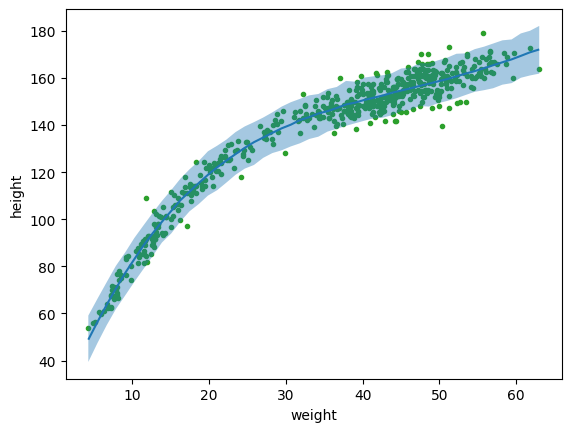

In [10]:
#Predicting the model
bmb.interpret.plot_predictions(polynomial1, idata_polynomial1, "weight", pps=True)
plt.plot(howellData.weight, howellData.height, "C2.", zorder=-3)

**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

So, when reading through this article, I learned that the mean plays a very important role in the final curve. Spefically, the author shows how the first graph has a mean of 0 and so the graph is going to converge to 0. If we think about it, this just does NOT make much sense. We know that our carbon dioxide emissions wil continue to increase, and so converging to 0 is NOT true to reality. That said, this model demonstrates how the mean is very important to good Guassian Process implementations.

**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

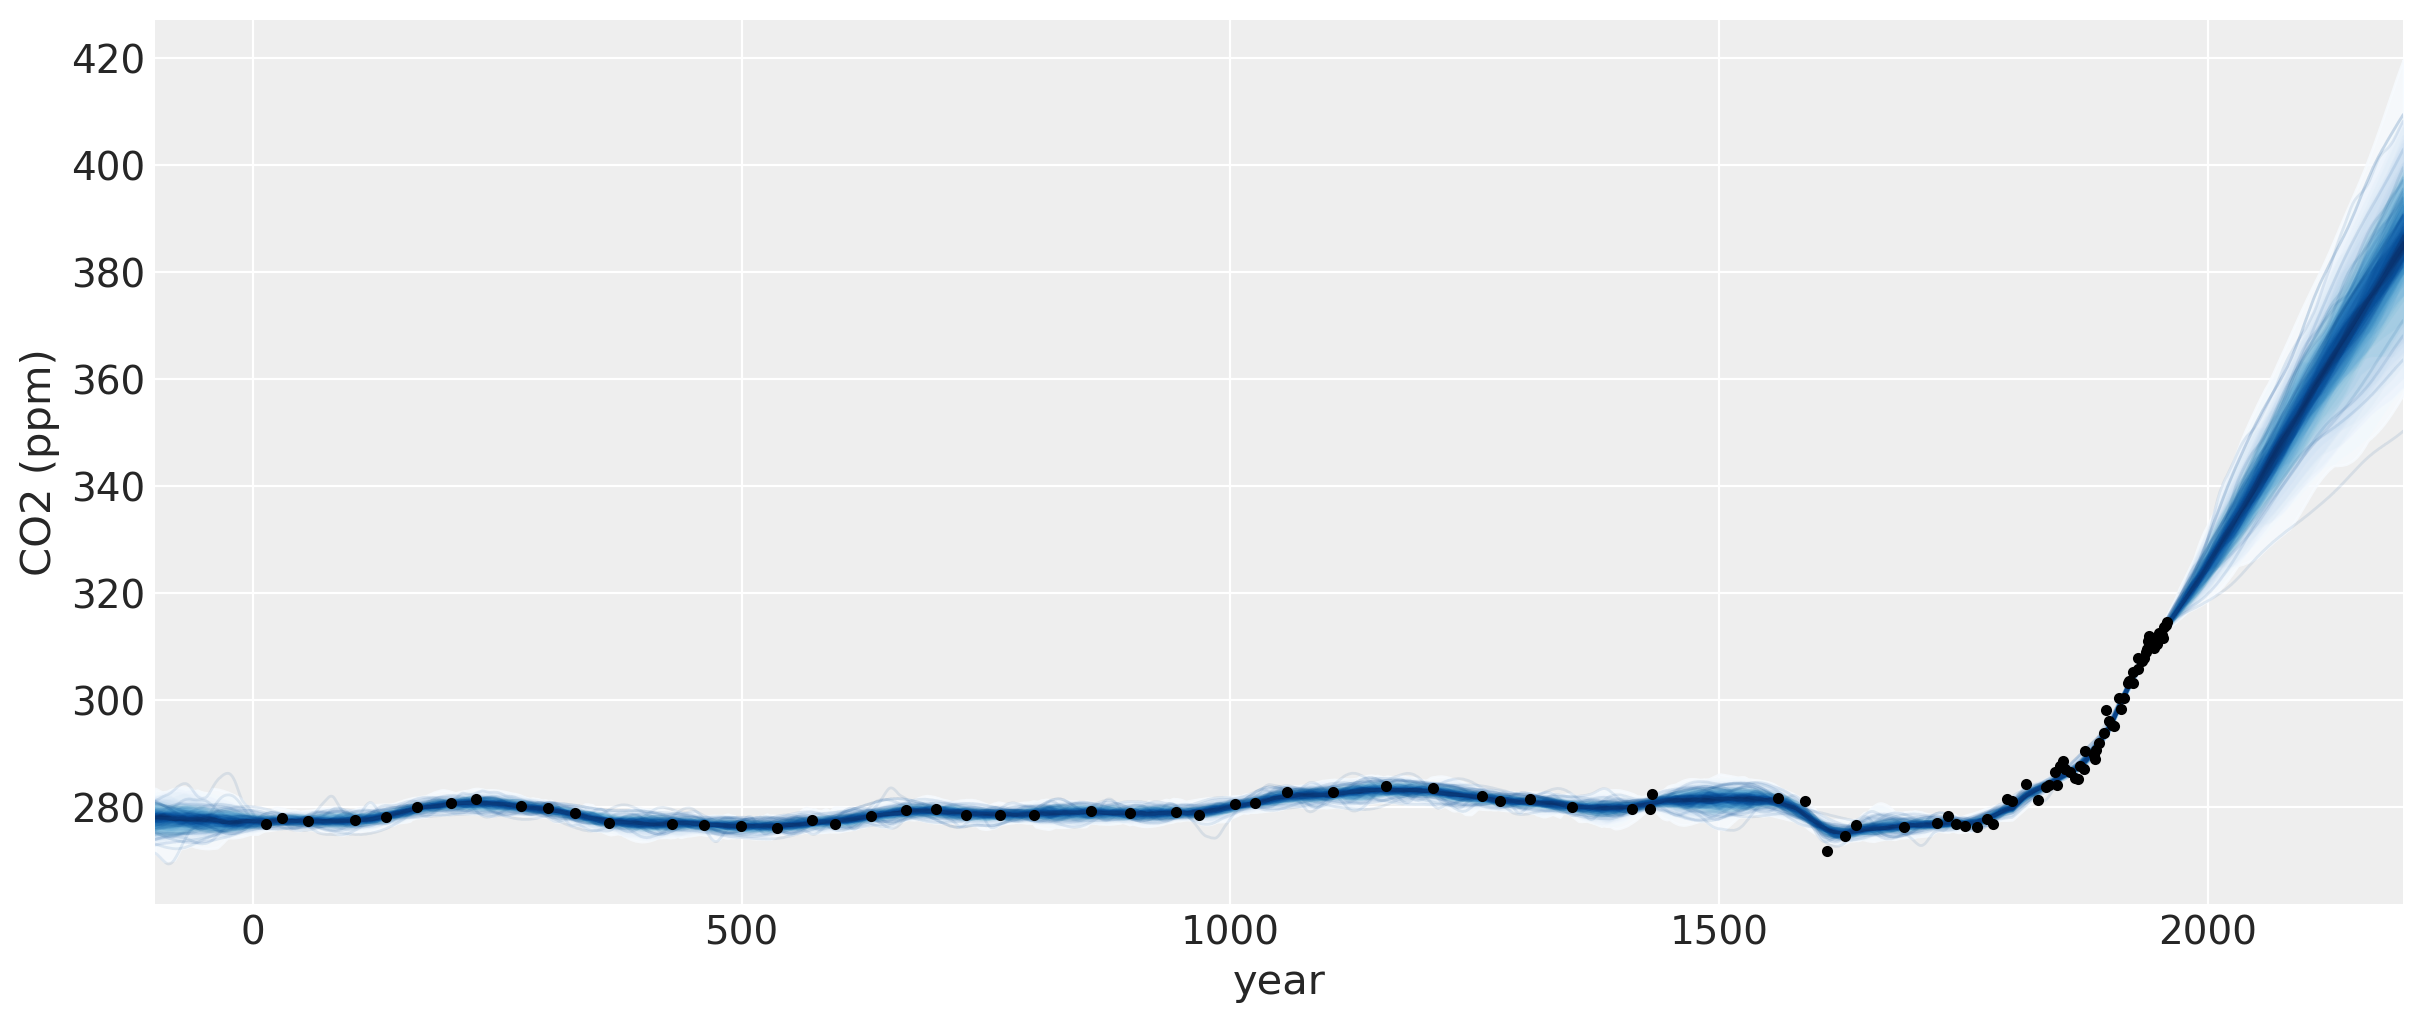

This is my favorite graph of the article.

As we were discussing with Mr. Arredondo, the colors of the graph are very cool!

No, but really, I think it is very cool how the authors were able to fix the graph to better model trends that our carbon dioxide emissions will continue to increase. The fact that we can improve our Gauassian Process by modifying the paramters shows the influential power of these paramters. Specifically, referring back to my previous learnings from the article, we know that the mean paramter is very influential. By changing this mean paramter, we were able to improve our model so that it did not contineu to converge at 0. This model also demonstrates how polynomial degree regression models are very flexible, being able to increase and decrease much more freely, improving our model perfomrance over time.